In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('updatedDatafinal.csv')

In [3]:
df.head()

,Restaurant Name,Area,Restaurant type,Ratings,Number of ratings,price,Address
0,Cricket Ground Cafe,Badda,Restaurant,4.1,169,1,"171/3 Middle Badda, হাতির ঝিল লিঙ্ক রোড"
1,Rosemery Restaurant,Badda,Bangladeshi,3.9,369,1,Madani Ave
2,Maaer Dowa Hotel & Restaurant,Badda,Restaurant,4.4,8,1,"East Badda, Borotek More, Badda"
3,K & K Burger and coffee ( Burger wala),Badda,Restaurant,4.8,32,1,40 S Badda Rd
4,Sanxi Thai Chinese,Badda,Chinese,3.9,1102,2,"House#1/B, Road#13, South"


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
letype = LabelEncoder()

In [5]:
areaInfo = le.fit_transform(df['Area'])
rest_type = letype.fit_transform(df['Restaurant type'])

In [6]:
areaInfo

array([ 0,  0,  0, ..., 23, 23, 23])

In [7]:
df['AreaValue'] = areaInfo
df['RestType'] = rest_type

In [8]:
df.head()

,Restaurant Name,Area,Restaurant type,Ratings,Number of ratings,price,Address,AreaValue,RestType
0,Cricket Ground Cafe,Badda,Restaurant,4.1,169,1,"171/3 Middle Badda, হাতির ঝিল লিঙ্ক রোড",0,48
1,Rosemery Restaurant,Badda,Bangladeshi,3.9,369,1,Madani Ave,0,5
2,Maaer Dowa Hotel & Restaurant,Badda,Restaurant,4.4,8,1,"East Badda, Borotek More, Badda",0,48
3,K & K Burger and coffee ( Burger wala),Badda,Restaurant,4.8,32,1,40 S Badda Rd,0,48
4,Sanxi Thai Chinese,Badda,Chinese,3.9,1102,2,"House#1/B, Road#13, South",0,19


In [9]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

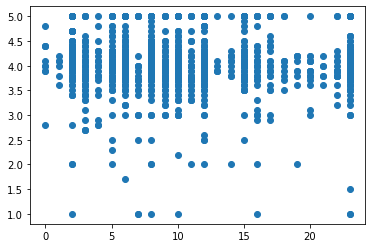

In [10]:
plt.scatter(df['AreaValue'],df['Ratings'])

In [11]:
df.head()

,Restaurant Name,Area,Restaurant type,Ratings,Number of ratings,price,Address,AreaValue,RestType
0,Cricket Ground Cafe,Badda,Restaurant,4.1,169,1,"171/3 Middle Badda, হাতির ঝিল লিঙ্ক রোড",0,48
1,Rosemery Restaurant,Badda,Bangladeshi,3.9,369,1,Madani Ave,0,5
2,Maaer Dowa Hotel & Restaurant,Badda,Restaurant,4.4,8,1,"East Badda, Borotek More, Badda",0,48
3,K & K Burger and coffee ( Burger wala),Badda,Restaurant,4.8,32,1,40 S Badda Rd,0,48
4,Sanxi Thai Chinese,Badda,Chinese,3.9,1102,2,"House#1/B, Road#13, South",0,19


In [12]:
scaler = MinMaxScaler()

In [13]:

df['AreaValue'] = scaler.fit_transform(df[['AreaValue']])

df['Ratings'] = scaler.fit_transform(df[['Ratings']])

df['price'] = scaler.fit_transform(df[['price']])
df['RestType'] = scaler.fit_transform(df[['RestType']])



In [14]:
df.head()

,Restaurant Name,Area,Restaurant type,Ratings,Number of ratings,price,Address,AreaValue,RestType
0,Cricket Ground Cafe,Badda,Restaurant,0.775,169,0.0,"171/3 Middle Badda, হাতির ঝিল লিঙ্ক রোড",0.0,0.827586
1,Rosemery Restaurant,Badda,Bangladeshi,0.725,369,0.0,Madani Ave,0.0,0.086207
2,Maaer Dowa Hotel & Restaurant,Badda,Restaurant,0.850,8,0.0,"East Badda, Borotek More, Badda",0.0,0.827586
3,K & K Burger and coffee ( Burger wala),Badda,Restaurant,0.950,32,0.0,40 S Badda Rd,0.0,0.827586
4,Sanxi Thai Chinese,Badda,Chinese,0.725,1102,0.5,"House#1/B, Road#13, South",0.0,0.327586


In [15]:
km = KMeans(n_clusters=24)
y_predicted = km.fit_predict(df[['AreaValue','Ratings','price','RestType']])
df['cluter'] = y_predicted

In [16]:
df.head(50)

,Restaurant Name,Area,Restaurant type,Ratings,Number of ratings,price,Address,AreaValue,RestType,cluter
0,Cricket Ground Cafe,Badda,Restaurant,0.775,169,0.0,"171/3 Middle Badda, হাতির ঝিল লিঙ্ক রোড",0.000000,0.827586,9
1,Rosemery Restaurant,Badda,Bangladeshi,0.725,369,0.0,Madani Ave,0.000000,0.086207,8
2,Maaer Dowa Hotel & Restaurant,Badda,Restaurant,0.850,8,0.0,"East Badda, Borotek More, Badda",0.000000,0.827586,9
3,K & K Burger and coffee ( Burger wala),Badda,Restaurant,0.950,32,0.0,40 S Badda Rd,0.000000,0.827586,9
4,Sanxi Thai Chinese,Badda,Chinese,0.725,1102,0.5,"House#1/B, Road#13, South",0.000000,0.327586,7
5,Soul Food Restaurant & Cafe,Badda,Restaurant,0.850,8,0.0,Satarkul Rd,0.000000,0.827586,9
6,The Artichoke,Badda,Restaurant,0.850,178,0.0,"Arma Majeda Malik Tower , Holding No# 215, Bir...",0.000000,0.827586,9
7,Cabana Restaurant and Party Center(Roof Top),Badda,Restaurant,0.750,143,0.5,"House 04, Road -10, DIT Project, Merul Badda D...",0.000000,0.827586,2
8,Sanzida Hotel and Restaurant,Badda,Restaurant,0.750,23,0.0,"Flat 2A, 3 Rd No 16",0.000000,0.827586,9
9,Niloy Restaurant,Badda,Restaurant,0.450,6,0.0,"House-1, Main Road, Block-H, Aftabnagar, Badda",0.000000,0.827586,12


In [17]:
df.tail(50)

,Restaurant Name,Area,Restaurant type,Ratings,Number of ratings,price,Address,AreaValue,RestType,cluter
1581,Trouvaille,Uttara,AsianFusion,0.850,1099,0.5,উত্তরা,1.0,0.051724,5
1582,Great BBQ,Uttara,Restaurant,0.775,53,0.0,"NR Complex, 4A Road-05",1.0,0.827586,15
1583,Ma restaurant,Uttara,Restaurant,0.500,2,0.0,33 Ranavola Rd,1.0,0.827586,14
1584,Hotplate,Uttara,Restaurant,0.825,161,0.0,"House 6, 4 Lake Dr Rd",1.0,0.827586,15
1585,Sector 7 Restaurant,Uttara,Restaurant,0.750,1346,0.0,"Plot 11, Sector-07, Uttara, Service Rd",1.0,0.827586,15
1586,Chillox Uttara,Uttara,Restaurant,0.825,2002,0.5,10 Sonargaon Janapath,1.0,0.827586,0
1587,Mexican Spicy,Uttara,Fast Food,0.800,24,0.0,"Shop No: 810, Grand Zam Zam Tower, Sonargaon J...",1.0,0.448276,10
1588,Chhekapora - ছ্যাকা পোড়া,Uttara,Restaurant,0.725,620,0.5,42 Gareeb-e-Nawaz Ave,1.0,0.827586,0
1589,KICK OFF Uttara,Uttara,Restaurant,0.725,274,0.5,"House # 05 , Road # 15 , Sector # 03",1.0,0.827586,0
1590,LA TING TING,Uttara,Restaurant,0.750,64,0.0,"Shohel Market Rooftop Beside Rupayan City, Sho...",1.0,0.827586,15


In [18]:
df = df.drop('Address', axis=1)

In [20]:
df.head(50)

,Restaurant Name,Area,Restaurant type,Ratings,Number of ratings,price,AreaValue,RestType,cluter
0,Cricket Ground Cafe,Badda,Restaurant,0.775,169,0.0,0.000000,0.827586,9
1,Rosemery Restaurant,Badda,Bangladeshi,0.725,369,0.0,0.000000,0.086207,8
2,Maaer Dowa Hotel & Restaurant,Badda,Restaurant,0.850,8,0.0,0.000000,0.827586,9
3,K & K Burger and coffee ( Burger wala),Badda,Restaurant,0.950,32,0.0,0.000000,0.827586,9
4,Sanxi Thai Chinese,Badda,Chinese,0.725,1102,0.5,0.000000,0.327586,7
5,Soul Food Restaurant & Cafe,Badda,Restaurant,0.850,8,0.0,0.000000,0.827586,9
6,The Artichoke,Badda,Restaurant,0.850,178,0.0,0.000000,0.827586,9
7,Cabana Restaurant and Party Center(Roof Top),Badda,Restaurant,0.750,143,0.5,0.000000,0.827586,2
8,Sanzida Hotel and Restaurant,Badda,Restaurant,0.750,23,0.0,0.000000,0.827586,9
9,Niloy Restaurant,Badda,Restaurant,0.450,6,0.0,0.000000,0.827586,12


In [24]:
df = df.sort_values(by='cluter', ascending=False)

In [25]:
df.head()

,Restaurant Name,Area,Restaurant type,Ratings,Number of ratings,price,AreaValue,RestType,cluter
1533,Premium Sweets,Uttara,Restaurant,0.800,136,1.0,1.000000,0.827586,23
1225,Jhaalmukh Restaurant Ltd.,Old Dhaka,Restaurant,0.725,288,1.0,0.652174,0.827586,23
1202,Bird's Eye Roof Top Restaurant and Convention ...,Naya Paltan,Restaurant,0.800,1727,1.0,0.608696,0.827586,23
1374,Cielo Rooftop,Ramna,Restaurant,0.825,764,1.0,0.739130,0.827586,23
1480,Mainland China,Uttara,Chinese,0.800,1111,1.0,1.000000,0.327586,23


In [26]:
df.head(50)

,Restaurant Name,Area,Restaurant type,Ratings,Number of ratings,price,AreaValue,RestType,cluter
1533,Premium Sweets,Uttara,Restaurant,0.800,136,1.0,1.000000,0.827586,23
1225,Jhaalmukh Restaurant Ltd.,Old Dhaka,Restaurant,0.725,288,1.0,0.652174,0.827586,23
1202,Bird's Eye Roof Top Restaurant and Convention ...,Naya Paltan,Restaurant,0.800,1727,1.0,0.608696,0.827586,23
1374,Cielo Rooftop,Ramna,Restaurant,0.825,764,1.0,0.739130,0.827586,23
1480,Mainland China,Uttara,Chinese,0.800,1111,1.0,1.000000,0.327586,23
1494,Real Thai,Uttara,Restaurant,0.775,510,1.0,1.000000,0.827586,23
1479,Lake Terrace,Uttara,Steak,0.775,2720,1.0,1.000000,0.879310,23
1223,Pizza Inn,Old Dhaka,Pizza,0.775,2290,1.0,0.652174,0.793103,23
1206,Hotel Kasturi (Pvt.) Ltd.,Naya Paltan,Restaurant,0.800,678,1.0,0.608696,0.827586,23
1521,Premium Sweets,Uttara,Restaurant,0.825,1077,1.0,1.000000,0.827586,23
